# @raizinho's (of livecoding.tv fame), Cool Sraping Example

We used the ["Xpath Helper"](https://chrome.google.com/webstore/detail/xpath-helper/hgimnogjllphhhkhlmebbmlgjoejdpjl?hl=en") plugin for chrome to build our XPath expression.

The source site is http://www.transfermarkt.com/ligue-1/startseite/wettbewerb/FR1.  The site will not load a valid 200 response unless you send it a user-agent and referer headers.  You can reference these items within chrome network debug (cmd-option-j), and right click on a request and choose "curl request" or just copy / paste the headers produced by the browser.

[<img src="http://snag.gy/BsFhU.jpg" width="800">](http://snag.gy/BsFhU.jpg)

**test



In [1]:
from lxml import html
from lxml import etree
import requests, pprint, json, re, os, pandas as pd, matplotlib, seaborn as sns

%matplotlib inline

In [2]:
def scrape():

    url     =   'http://www.transfermarkt.com/ligue-1/startseite/wettbewerb/FR1'
    print " Getting URL: %s" % url

    headers =   {
        'Referer': 'http://www.transfermarkt.com/ligue-1/startseite/wettbewerb/FR1',
        'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36'
    }


    page    =   requests.get(url, headers=headers)
    tree    =   html.fromstring(page.text)  

    path    =   "//table"
    path    =   "//div[@id='main']/div/div/div/div/div/table/tbody/tr"
    path    =   tree.xpath(path)
    # print page.text
    # data    =   ",".join([element for element in path])
    return path


 Getting URL: http://www.transfermarkt.com/ligue-1/startseite/wettbewerb/FR1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bbe8f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bed6310>]], dtype=object)

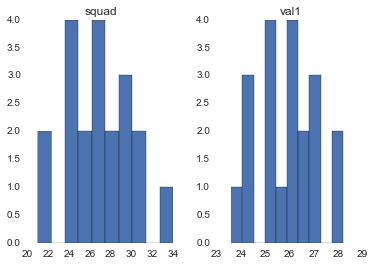

In [4]:
elements = scrape()
data = []

for tr in elements:
    
    row = []
    
    for td in tr:
        
        if len(td.getchildren()) == 1:
            row.append(td.getchildren()[0].text)
        else:
            row.append(td.text)
        
    data.append(row)

raisin = pd.DataFrame(data, columns=['_', 'display', 'name', 'squad', 'val1', 'players', 'total_market', 'market', '_', '_'])
raisin['squad']  =  map(int, raisin['squad'])
raisin['val1']   =  raisin['val1'].map(lambda val: float(val.replace(',', '.')))

test = pd.DataFrame(raisin[['squad', 'val1']])
test.index = raisin['name']
# test.sort('val1').plot(kind='barh', figsize=(16, 8))
test.hist()
# raisin.iloc[]
